In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("bank-full.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
df.shape

(11162, 17)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [ ]:
from pandas.core.arrays import categorical
categorical_features=[feature for feature in df.columns if (df[feature].dtypes=='O')]
print(f'there are {len(categorical_features)} categorical variables')
categorical_features

there are 10 categorical variables


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

In [ ]:
numerical_features=[feature for feature in df.columns if (df[feature].dtypes !='O')]
print(f'there are {len(numerical_features)} numerical_features')
numerical_features

there are 7 numerical_features


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

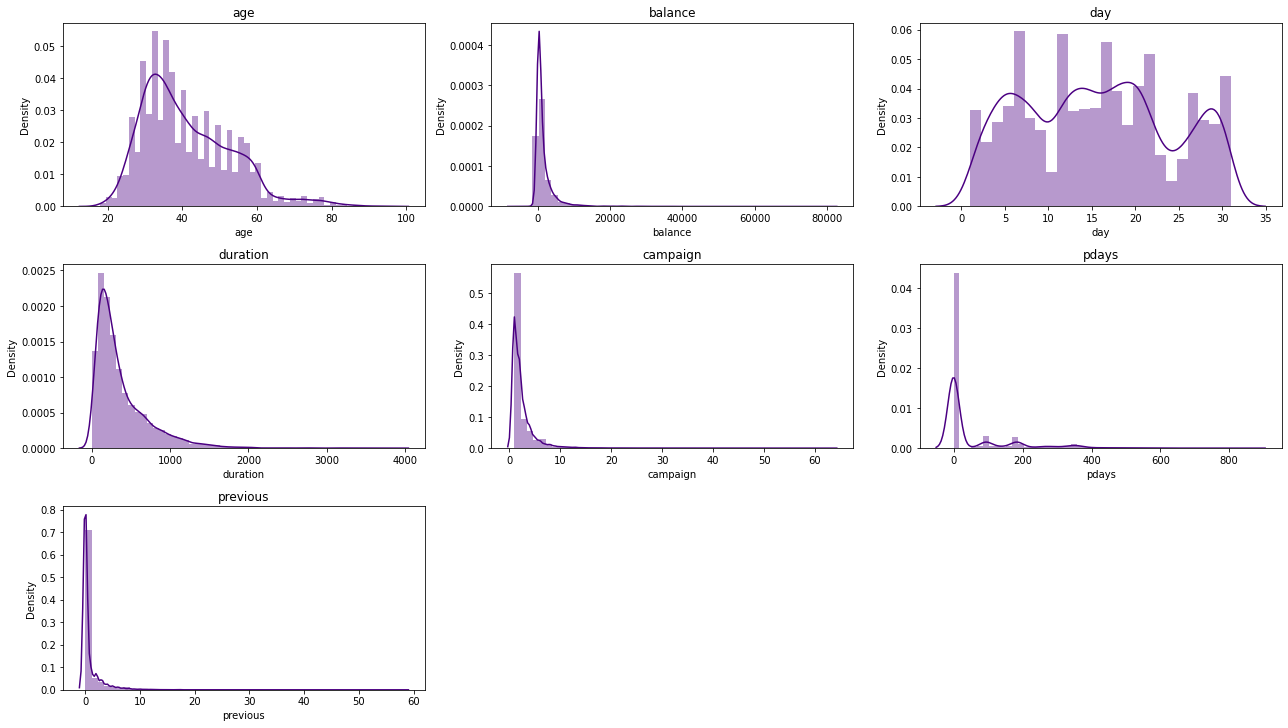

In [ ]:
n=1
plt.figure(figsize=(18,40))
for i in numerical_features:
  plt.subplot(12,3,n)
  n=n+1
  sns.distplot(df[i],color="indigo")
  plt.title(i)
  plt.tight_layout()

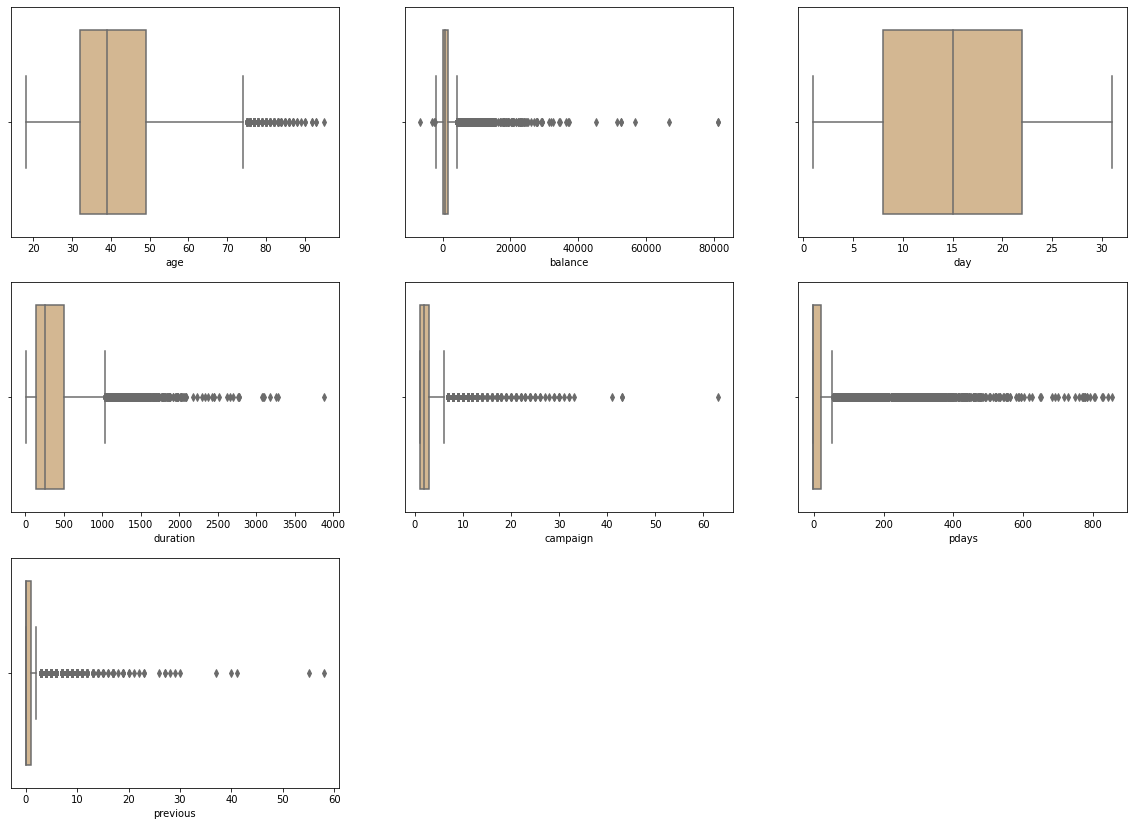

In [ ]:
plt.figure(figsize=(20,60),facecolor="white")
plotnumber=1
for numerical_feature in numerical_features:
  ax=plt.subplot(12,3,plotnumber)
  sns.boxplot(df[numerical_feature],color="#DEB887")
  plt.xlabel(numerical_feature)
  plotnumber+=1
plt.show()

Text(0.5, 1.0, 'count on the basis of day')

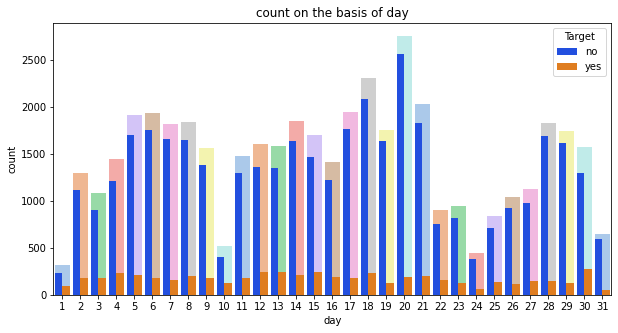

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(df.day,ax=ax,palette="pastel")
sns.countplot(df.day,hue=df.Target,ax=ax,palette="bright")
plt.xlabel("day")
plt.title("count on the basis of day")

Text(0.5, 1.0, 'count on the basis of campaign')

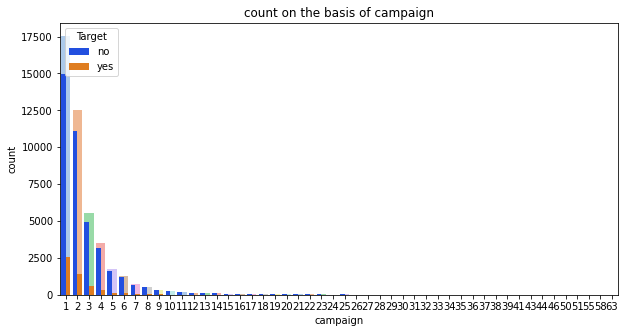

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(df.campaign,ax=ax,palette="pastel")
sns.countplot(df.campaign,hue=df.Target,ax=ax,palette="bright")
plt.xlabel("campaign")
plt.title("count on the basis of campaign")

Text(0.5, 1.0, 'Count on basis of previous')

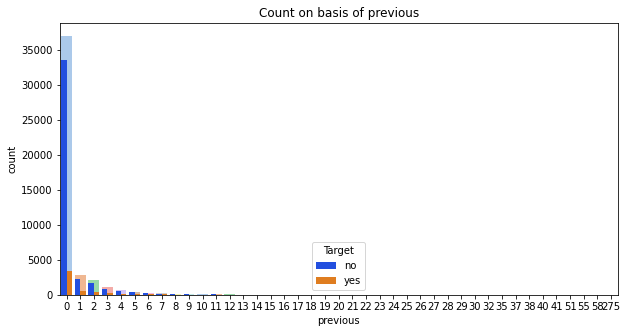

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(df.previous,ax=ax,palette="pastel")
sns.countplot(df.previous,hue=df.Target,ax=ax,palette="bright")
plt.xlabel("previous")
plt.title("Count on basis of previous")

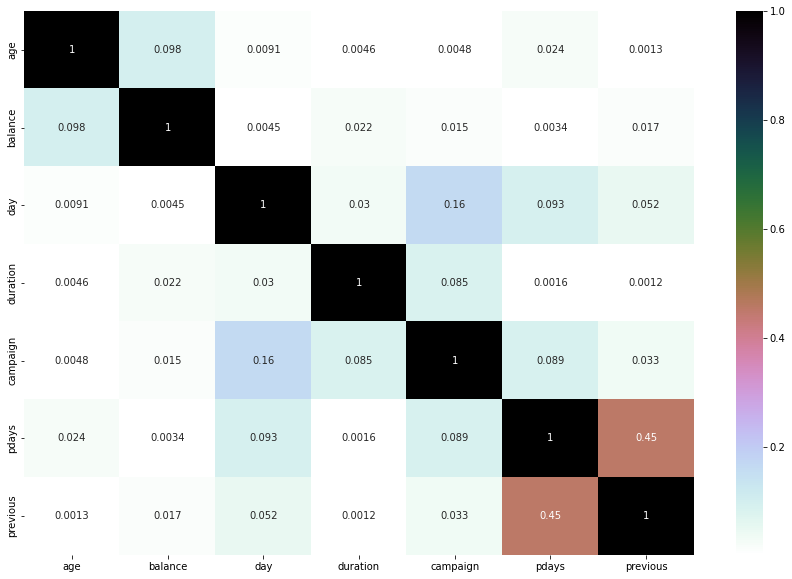

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(abs(df.corr()),cmap='cubehelix_r',annot=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def cal_VIF(F):
  VIF=pd.DataFrame()
  VIF["variables"]=F.columns
  VIF["VIF"]=[variance_inflation_factor(F.values,i) for i in range(F.shape[1])]

  return (VIF)

In [ ]:
cal_VIF(df[[i for i in df.describe().columns]])

,variables,VIF
0,age,5.004058
1,balance,1.212908
2,day,3.984268
3,duration,1.901309
4,campaign,1.824694
5,pdays,1.454202
6,previous,1.341641


Text(0.5, 1.0, 'Count of different type of jobs')

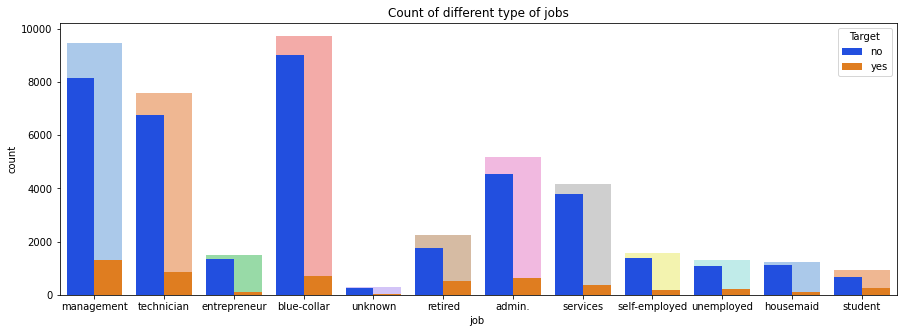

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(df.job, ax=ax, palette='pastel')
sns.countplot(df.job, hue=df.Target,ax=ax, palette='bright')
plt.xlabel('job ')
plt.title('Count of different type of jobs')

Text(0.5, 1.0, 'Count of people with different marital status')

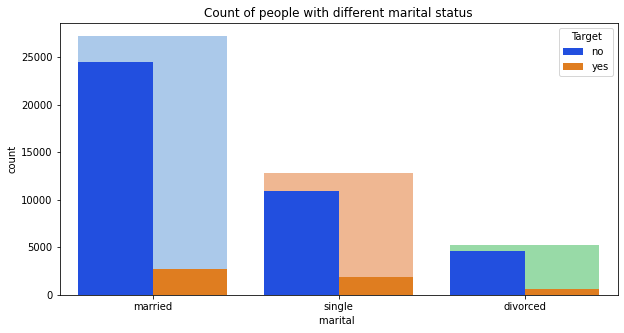

In [ ]:
# plotting the count plot of marital status with target variable.

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df.marital, ax=ax, palette='pastel')
sns.countplot(df.marital, hue=df.Target,ax=ax, palette='bright')
plt.xlabel('marital ')
plt.title('Count of people with different marital status')

Text(0.5, 1.0, 'Count of yes and no for different education level')

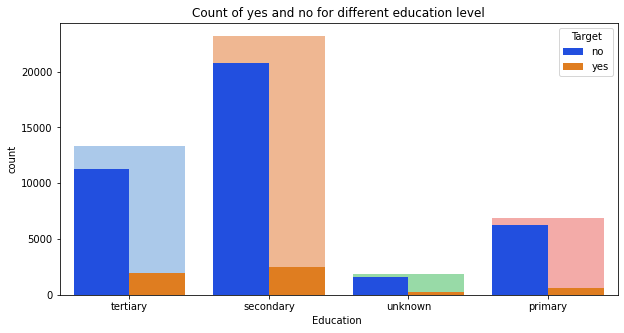

In [ ]:
# plotting the count plot of education  with target variable.

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df.education, ax=ax, palette='pastel')
sns.countplot(df.education, hue=df.Target,ax=ax, palette='bright')
plt.xlabel('Education ')
plt.title('Count of yes and no for different education level')

Text(0.5, 1.0, 'Count of yes and no for different default')

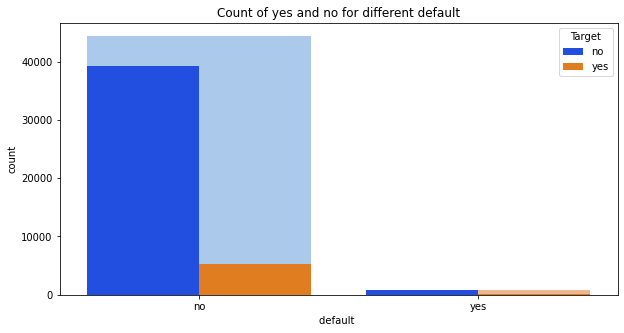

In [ ]:

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df.default, ax=ax, palette='pastel')
sns.countplot(df.default, hue=df.Target,ax=ax, palette='bright')
plt.xlabel('default ')
plt.title('Count of yes and no for different default')

Text(0.5, 1.0, 'Count of yes and no for different housing')

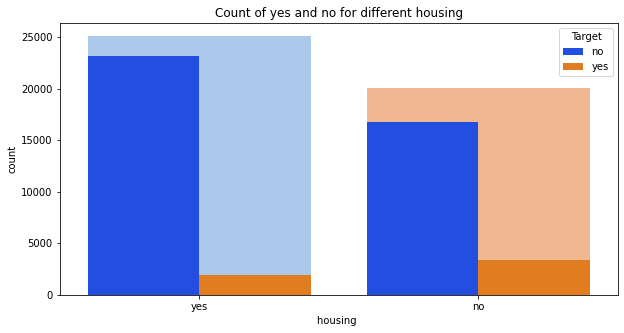

In [ ]:
# plotting the count plot of housing loan with target variable.

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df.housing, ax=ax, palette='pastel')
sns.countplot(df.housing, hue=df.Target,ax=ax, palette='bright')
plt.xlabel('housing ')
plt.title('Count of yes and no for different housing')

Text(0.5, 1.0, 'Count of yes and no for loan')

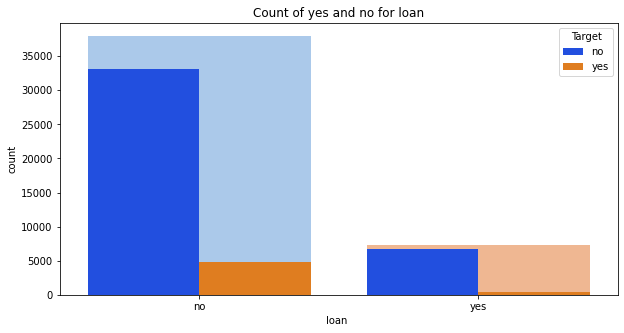

In [ ]:
# plotting the count plot of personal loan with target variable.

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df.loan, ax=ax, palette='pastel')
sns.countplot(df.loan, hue=df.Target,ax=ax, palette='bright')
plt.xlabel('loan ')
plt.title('Count of yes and no for loan')

Text(0.5, 1.0, 'Count of yes and no for loan')

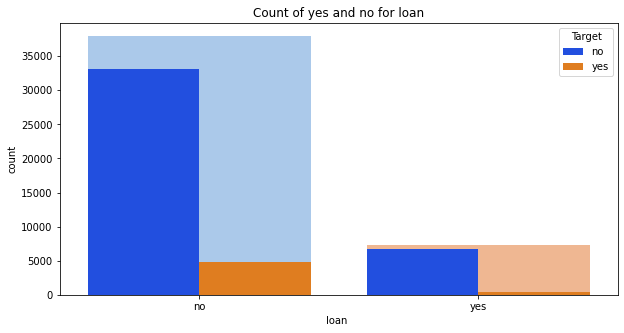

In [ ]:
# plotting the count plot of personal loan with target variable.

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df.loan, ax=ax, palette='pastel')
sns.countplot(df.loan, hue=df.Target,ax=ax, palette='bright')
plt.xlabel('loan ')
plt.title('Count of yes and no for loan')

Text(0.5, 1.0, 'Count on the basis of month')

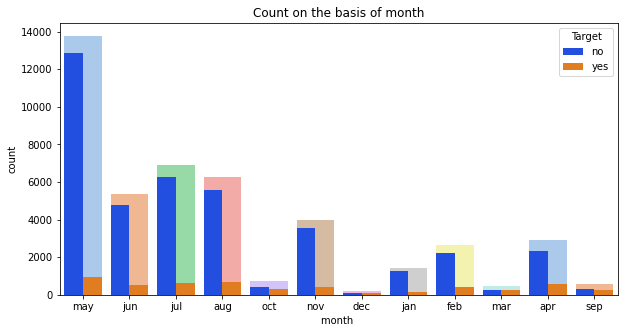

In [ ]:
# plotting the count plot of months with target variable.

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df.month, ax=ax, palette='pastel')
sns.countplot(df.month, hue=df.Target,ax=ax, palette='bright')
plt.xlabel('month ')
plt.title('Count on the basis of month')

Text(0.5, 1.0, 'Count on the basis of poutcome')

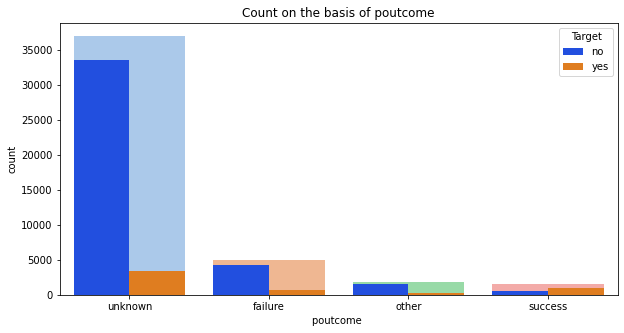

In [ ]:
# plotting the count plot of previous outcome with target variable.

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df.poutcome, ax=ax, palette='pastel')
sns.countplot(df.poutcome, hue=df.Target,ax=ax, palette='bright')
plt.xlabel('poutcome ')
plt.title('Count on the basis of poutcome')

In [ ]:
# Getting the dummies of all the categorical features

cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df = pd.concat([df.drop(col, axis=1),pd.get_dummies(df[col], 
                            prefix=col, prefix_sep='_',drop_first=True, 
                            dummy_na=False)], axis=1)

In [ ]:
# Converting the boolean fearures in binary

bool_columns = ['default', 'housing', 'loan', 'Target']
for col in  bool_columns:
    df[col+'_new']=df[col].apply(lambda x : 1 if x == 'yes' else 0)
    df.drop(col, axis=1, inplace=True)

In [ ]:
# Renamimg our target variable 'y' to 'Subscribe'

df.rename(columns = {'Target_new':'Subscribe'}, inplace = True)

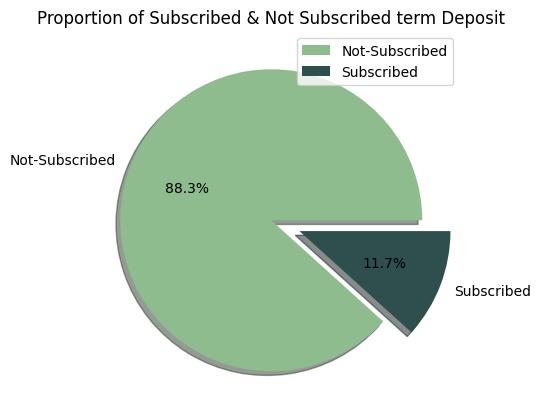

In [ ]:
# Ploting the pie chart to check the balance in the Target Variable.

plt.figure(figsize=(7,5), dpi=100)
proportion = df['Subscribe'].value_counts()
labels = ['Not-Subscribed','Subscribed']
plt.title('Proportion of Subscribed & Not Subscribed term Deposit')
plt.pie(proportion, explode=(0,0.2),labels=labels, shadow = True, autopct = '%1.1f%%', colors= ['#8FBC8F','#2F4F4F'])
plt.legend()
plt.show()

In [ ]:
df['Subscribe'].groupby(df['Subscribe']).count()

Subscribe
0    39922
1     5289
Name: Subscribe, dtype: int64

In [ ]:
# Importing necessary Libraries.

from sklearn.model_selection import train_test_split

In [ ]:
# Data for all the independent variables
X = df.drop(['Subscribe'],axis=1)

# Data for the dependent variable
y = df['Subscribe']

# Dividing the data in training and test dataset.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# checking the shape of our train and test data.
print(X_train.shape)
print(X_test.shape)

(36168, 42)
(9043, 42)


In [ ]:
# Importing necessary libraries
import imblearn
from imblearn.over_sampling import SMOTE

# Creating the instance
sm = SMOTE(random_state = 0)

In [ ]:
# fit predictor and target variable

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [ ]:
# checking the length of our train set before and after handeling imbalance.

print ('original dataset length',len(X_train))
print ('Resample dataset length',len(X_train_sm))

original dataset length 36168
Resample dataset length 63884


In [ ]:
# Transforming data 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_sm)
X_test = scaler.transform(X_test)

In [ ]:
# Importing important library

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

In [ ]:
# Creating model object for logistic regression.

clf = LogisticRegression(fit_intercept=True, max_iter=10000)

In [ ]:
# fitting the model.

clf.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=10000)

In [ ]:
# Getting the predicted classes for training and testing set

train_class_preds = clf.predict(X_train_sm)
test_class_preds = clf.predict(X_test)

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy = accuracy_score(train_class_preds, y_train_sm)
test_accuracy = accuracy_score(test_class_preds, y_test)


In [ ]:
# Display accuracies.

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)


The accuracy on train data is  0.9299511614801829
The accuracy on test data is  0.8802388587858012


In [ ]:
# Confusion Matrix for logistic regression classifier.

cf_matrix = confusion_matrix(y_test,test_class_preds)
cf_matrix

array([[7795,  185],
       [ 898,  165]])

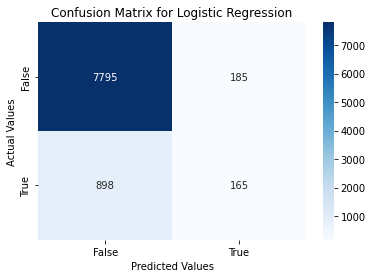

In [ ]:
# Ploting the confusion matrix.

labels = ['7795','185','898','165']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Logistic Regression');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Predicted values.
y_pred_log_reg = clf.predict(X_test)

In [ ]:
# Getting classification report.

dict_1 = classification_report(y_test, y_pred_log_reg, output_dict = True)

In [ ]:
# Dataframe to contain Model performance analysis reports.
res_df = pd.DataFrame()

In [ ]:
# Appending the scores in the dataframe.

tempodf=pd.DataFrame(dict_1).transpose()
tempodf['Model'] = 'Logistic Regression Classifier'
res_df = res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.880239,0.880239,0.880239,0.880239,Logistic Regression Classifier


In [ ]:
# Importing necessary libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Creating model object for Decision Tree Classifier.

dt_clf = DecisionTreeClassifier()

In [ ]:
# Storing the hyperparameters in Dict

parameters = {'max_depth' : [4,6,8,10],
              'min_samples_split' : [10,20,30,40,50],
              'min_samples_leaf' : [10,15,20]}

In [ ]:
# Applying GridSearchCV for hyperparameter tuning

dt_clf = GridSearchCV(dt_clf, parameters, scoring='roc_auc', cv=5)

In [ ]:
# Fitting the model

dt_clf.fit(X_train_sm,y_train_sm)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [10, 20, 30, 40, 50]},
             scoring='roc_auc')

In [ ]:
# Checking the best parameters

dt_clf.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=15, min_samples_split=50)

In [ ]:
# Getting the predicted classes for training and testing set

train_dt_prediction = dt_clf.predict(X_train_sm)
test_dt_prediction = dt_clf.predict(X_test)

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy_dt = accuracy_score(train_dt_prediction, y_train_sm)
test_accuracy_dt = accuracy_score(test_dt_prediction, y_test)

# Display accuracies.
print("The accuracy on train data is ", train_accuracy_dt)
print("The accuracy on test data is ", test_accuracy_dt)


The accuracy on train data is  0.9214357272556508
The accuracy on test data is  0.8824505142098861


In [ ]:
# Confusion Matrix for random forest classifier.

dt_cf_matrix = confusion_matrix(y_test,test_dt_prediction)
dt_cf_matrix

array([[7980,    0],
       [1063,    0]])

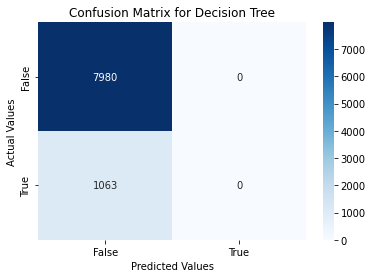

In [ ]:
# Plotting the confusion matrix

labels = ['7980','0','1063','0']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(dt_cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Decision Tree');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Predicted values.

y_pred_dt = dt_clf.predict(X_test)

In [ ]:
# Getting classification report.

dict_2 = classification_report(y_test, y_pred_dt, output_dict = True)

In [ ]:
# Storing the scores in a dataframe

tempodf=pd.DataFrame(dict_2).transpose()
tempodf['Model'] = 'Decision Tree Classifier'
res_df = res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.880239,0.880239,0.880239,0.880239,Logistic Regression Classifier
accuracy,0.882451,0.882451,0.882451,0.882451,Decision Tree Classifier
